In [3]:
!pip install -q transformers
!pip install -q sentencepiece
!pip install -q jiwer
!pip install -q datasets
!pip install -q evaluate
!pip install -q -U accelerate

!pip install -q matplotlib
!pip install -q protobuf==3.20.1
!pip install -q tensorboard
!pip install elementpath
!pip install scikit-learn
!pip install numpy==1.26.4
# !pip install transformers
!pip install transformers==4.45.2
# !pip install git+https://github.com/huggingface/transformers@muellerzr-more-models-sadface
# !pip install transformers==4.49.0.dev0
# !pip install tokenizers==0.21.0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip instal


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import torch
import evaluate
import numpy as np
import pandas as pd
import glob as glob
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from PIL import Image
from zipfile import ZipFile
from tqdm.notebook import tqdm
from dataclasses import dataclass
from torch.utils.data import Dataset
from urllib.request import urlretrieve
from transformers import (
    RobertaTokenizerFast,
    VisionEncoderDecoderModel, 
    TrOCRProcessor,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    default_data_collator
)

block_plot = False
plt.rcParams['figure.figsize'] = (12, 9)
bold = f"\033[1m"
reset = f"\033[0m"

c:\Users\dhlabadmin\Desktop\m-test\ProjectTrOCR\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Pre-processing

In [5]:
# from sklearn.model_selection import train_test_split
# image_dir = "C:/Users/dhlabadmin/Desktop/m-test/full-datasets/unpacked-datasets/1365312/"
# image_dir = "C:/Users/dhlabadmin/Desktop/m-test/full-datasets/unpacked-datasets/test/mini1365312/"
image_dir = "C:/Users/dhlabadmin/Desktop/m-test/full-datasets/unpacked-datasets/1365312/1365312half/"

# dataset = pd.read_csv(os.path.join(image_dir, "cropped_6470048.txt"), delimiter=",", header=None, names=["file_name", "text"], on_bad_lines="skip")
# dataset.head()

In [6]:
# test_df = pd.read_csv(os.path.join(image_dir, "1365312_test.txt"), delimiter=",", header=None, names=["file_name", "text"], on_bad_lines="skip")
# train_df = pd.read_csv(os.path.join(image_dir, "1365312_train.txt"), delimiter=",", header=None, names=["file_name", "text"], on_bad_lines="skip")
test_df = pd.read_csv(os.path.join(image_dir, "1365312half2_test.txt"), delimiter=",", header=None, names=["file_name", "text"], on_bad_lines="skip")
train_df = pd.read_csv(os.path.join(image_dir, "1365312half2_train.txt"), delimiter=",", header=None, names=["file_name", "text"], on_bad_lines="skip")
# test_df = pd.read_csv(os.path.join(image_dir, "mini1365312_test.txt"), delimiter=",", header=None, names=["file_name", "text"], on_bad_lines="skip")
# train_df = pd.read_csv(os.path.join(image_dir, "mini1365312_train.txt"), delimiter=",", header=None, names=["file_name", "text"], on_bad_lines="skip")

In [7]:
# train_df.drop(train_df.tail(10000).index, inplace = True)
train_df.head()

,file_name,text
0,Skan_20200310_25_(4)_30.png,и улыбки
1,Vinokurov_1918-0022_16.png,кушкиными слезами» – ан нет! Не нежный запах ц...
2,Skan_20190925_3_(15)_20.png,Злые
3,Skan_20190925_15_(5)_28.png,"луна,"
4,P-353-020_31.png,"нам обед, в 4 часа полк передвинулся бли¬"


In [8]:
# test_df.drop(test_df.tail(2242).index, inplace = True)
test_df.head()

,file_name,text
0,maria_diary011_02.png,"3-й час для меня самый тяжелый, я его с трудом..."
1,Untitled-119_06.png,лениковым в 1911 году осенью. Изба
2,Skan_20190925_22_(11)_03.png,"И женщина,"
3,Skan_20200310_6_(10)_38.png,пыль с них крылом;
4,Skan_20200310_22_(2)_31.png,нам насладиться.


## Training

In [9]:
def seed_everything(seed_value):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [59]:
@dataclass(frozen=True)
class TrainingConfig:
    BATCH_SIZE:    int = 2
    EPOCHS:        int = 10
    LEARNING_RATE: float = 2e-5

@dataclass(frozen=True)
class DatasetConfig:
    DATA_ROOT:     str = image_dir
    # DATA_ROOT:     str = "test_polygon/small_dataset"

@dataclass(frozen=True)
class ModelConfig:
    # MODEL_NAME: str = 'microsoft/trocr-base-handwritten'
    MODEL_NAME: str = "kazars24/trocr-base-handwritten-ru"
    # MODEL_NAME: str = "cyrillic_seq2seq_trocr_22"

In [60]:
min_height, min_width = 32, 32

def resize_if_needed(img):
    w, h = img.size
    new_w = max(w, min_width)
    new_h = max(h, min_height)
    if w < min_width or h < min_height:
        return transforms.functional.resize(img, (new_h, new_w))
    return img

# Augmentations.
train_transforms = transforms.Compose([
    resize_if_needed,
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.RandomRotation(degrees=(-2, 2), interpolation=transforms.InterpolationMode.BILINEAR, expand=True, fill=255),  # center=None,
    transforms.RandomAffine(degrees=0, shear=(-1, 1), translate=(0.01, 0.01), scale=(0.95, 1.05), fill=255)
    ])

# train_transforms = transforms.Compose([
#     transforms.ColorJitter(brightness=.5, hue=.3),
#     transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
#     transforms.RandomRotation(degrees=(-2, 2), interpolation=transforms.InterpolationMode.BILINEAR, expand=False, center=None, fill=255),
#     transforms.RandomAffine(degrees=0, shear=(-2, 2), translate=(0.02, 0.02), scale=(0.9, 1.1), fill=255)
#     ])

In [61]:
class CustomOCRDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=512):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_name = self.df['file_name'][idx]
        text = self.df['text'][idx]

        # assert text.strip() != "", f"ERROR Empty text in {idx}"
        if isinstance(text, (int, float)) or text is None:
            text = str(text)
        if isinstance(text, list) or all(isinstance(t, str) for t in text):
            pass
        else:
            text = [str(t) for t in text]

        # Read the image, apply augmentations, and get the transformed pixels.
        image = Image.open(self.root_dir + file_name).convert('RGB')
        image = train_transforms(image)
        pixel_values = self.processor(image, return_tensors='pt').pixel_values
        # Pass the text through the tokenizer and get the labels,
        # i.e. tokenized labels.
        labels = self.processor.tokenizer(text,
                                          padding='max_length',
                                          max_length=self.max_target_length).input_ids

        # We are using -100 as the padding token.
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        # print(f"Dataset ouput keys: {encoding.keys()}")

        return encoding

In [62]:
# my_tokenizer = RobertaTokenizerFast.from_pretrained("create_tokenizer/my_tokenizer")
from transformers import AutoTokenizer
my_tokenizer = AutoTokenizer.from_pretrained("kazars24/trocr-base-handwritten-ru")

In [63]:
processor = TrOCRProcessor.from_pretrained(ModelConfig.MODEL_NAME)
processor.tokenizer = my_tokenizer

train_dataset = CustomOCRDataset(
    # root_dir=os.path.join(DatasetConfig.DATA_ROOT, "1365312_train/"),
    # root_dir=os.path.join(DatasetConfig.DATA_ROOT, "6470048_train/"),
    # root_dir=os.path.join(DatasetConfig.DATA_ROOT, "1365312_train/"),
    # root_dir=os.path.join(DatasetConfig.DATA_ROOT, "mini1365312_train/"),
    root_dir=os.path.join(DatasetConfig.DATA_ROOT, "1365312half2_train/"),
    df=train_df,
    processor=processor
)
valid_dataset = CustomOCRDataset(
    # root_dir=os.path.join(DatasetConfig.DATA_ROOT, "1365312_test/"),
    # root_dir=os.path.join(DatasetConfig.DATA_ROOT, "1365312_test/"),
    # root_dir=os.path.join(DatasetConfig.DATA_ROOT, "mini1365312_test/"),
    root_dir=os.path.join(DatasetConfig.DATA_ROOT, "1365312half2_test/"),
    df=test_df,
    processor=processor
)

In [64]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(valid_dataset))

Number of training examples: 16722
Number of validation examples: 1489


In [65]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# class CustomVisionEncoderDecoderModel(VisionEncoderDecoderModel):
#     def forward(self, *args, num_items_in_batch=None, **kwargs):
#         return super().forward(*args, **kwargs)

# model = CustomVisionEncoderDecoderModel.from_pretrained(ModelConfig.MODEL_NAME).to(device)

In [66]:
model = VisionEncoderDecoderModel.from_pretrained(ModelConfig.MODEL_NAME).to(device)
# from transformers import AutoModelForImageTextToText
# model = AutoModelForImageTextToText.from_pretrained(ModelConfig.MODEL_NAME).to(device)
# print(model)

In [67]:
# Set special tokens used for creating the decoder_input_ids from the labels.
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# Set Correct vocab size.
model.config.vocab_size = model.config.decoder.vocab_size

model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [68]:
optimizer = optim.AdamW(
    model.parameters(), lr=TrainingConfig.LEARNING_RATE, weight_decay=0.0005
)

In [69]:
cer_metric = evaluate.load('cer')

def compute_cer(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

In [70]:
training_args = Seq2SeqTrainingArguments(
    # logging_dir="./results",
    # logging_first_step=True,
    predict_with_generate=True,
    # predict_with_generate=False,
    evaluation_strategy="steps",
    # evaluation_strategy="no",
    per_device_train_batch_size=TrainingConfig.BATCH_SIZE,
    per_device_eval_batch_size=TrainingConfig.BATCH_SIZE,
    fp16=True,
    output_dir='seq2seq_model_handwritten/',
    logging_steps=200,
    save_steps=int(len(train_dataset)/8),
    eval_steps=int(len(valid_dataset)/8),
    optim='adamw_torch',
    warmup_steps=int((len(valid_dataset)/8)),
    num_train_epochs=TrainingConfig.EPOCHS,
    disable_tqdm=False,
    gradient_accumulation_steps=1,
    gradient_checkpointing=True
)

c:\Users\dhlabadmin\Desktop\m-test\ProjectTrOCR\lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [71]:
# Initialize trainer.
trainer = Seq2SeqTrainer(model=model,
                         tokenizer=processor.tokenizer,
                         args=training_args,
                         compute_metrics=compute_cer,
                         train_dataset=train_dataset,
                         eval_dataset=valid_dataset,
                         data_collator=default_data_collator)

  0%|          | 0/83610 [1:31:38<?, ?it/s]


In [ ]:
# trainer = CustomTrainer(model=model,
#                         args=training_args,
#                         compute_metrics=compute_cer,
#                         train_dataset=train_dataset,
#                         eval_dataset=valid_dataset,
#                         data_collator=default_data_collator)
# from IPython.display import display, clear_output

# for step in range(1000):
#     clear_output(wait=True)

res = trainer.train()

                                                     
  0%|          | 186/83610 [10:13<5:42:37,  4.06it/s]

{'eval_loss': 1.6009588241577148, 'eval_cer': 0.5506480218281037, 'eval_runtime': 565.1935, 'eval_samples_per_second': 2.634, 'eval_steps_per_second': 1.318, 'epoch': 0.02}


  0%|          | 201/83610 [10:17<31:51:30,  1.38s/it]   

{'loss': 1.6445, 'grad_norm': 26.949424743652344, 'learning_rate': 4.999280782508631e-05, 'epoch': 0.02}


  0%|          | 372/83610 [10:58<5:25:10,  4.27it/s] 

In [ ]:
from numpy.core.multiarray import _reconstruct

torch.serialization.add_safe_globals([_reconstruct, np.dtype, np.int64])
chkp_path = "C:/Users/dhlabadmin/Desktop/m-test/Fine-Tuning-TrOCR/seq2seq_model_handwritten/checkpoint-68970"

In [ ]:
trainer.train(resume_from_checkpoint=chkp_path)

In [38]:
save_model = VisionEncoderDecoderModel.from_pretrained(chkp_path)
save_tokenizer = AutoTokenizer.from_pretrained(chkp_path)

save_model.save_pretrained("cyrillic_seq2seq_trocr_23")
save_tokenizer.save_pretrained("cyrillic_seq2seq_trocr_23")

('cyrillic_seq2seq_trocr_23\\tokenizer_config.json',
 'cyrillic_seq2seq_trocr_23\\special_tokens_map.json',
 'cyrillic_seq2seq_trocr_23\\vocab.json',
 'cyrillic_seq2seq_trocr_23\\merges.txt',
 'cyrillic_seq2seq_trocr_23\\added_tokens.json',
 'cyrillic_seq2seq_trocr_23\\tokenizer.json')

In [ ]:
processor.save_pretrained("cyrillic_seq2seq_trocr_22")

[]

In [58]:
from transformers import GenerationConfig

dir = "C:/Users/dhlabadmin/Desktop/m-test/full-datasets/unpacked-datasets/1365312/1365312half/inference/"
val_df = pd.read_csv(os.path.join(dir, "inference_notfull.txt"), delimiter=",", header=None, names=["file_name", "text"], on_bad_lines="skip")
valid_dataset1 = CustomOCRDataset(
    root_dir=dir,
    df=val_df,
    processor=processor
)
model1 = VisionEncoderDecoderModel.from_pretrained("cyrillic_seq2seq_trocr_23").to(device)
gen_config = GenerationConfig.from_pretrained("cyrillic_seq2seq_trocr_23")
model.generation_config = gen_config
trainer1 = Seq2SeqTrainer(model=model1,
                          tokenizer=processor.tokenizer,
                          args=training_args,
                          eval_dataset=valid_dataset1,
                          data_collator=default_data_collator)
metrics1 = trainer1.evaluate()
print("Eval loss: ", metrics1["eval_loss"])

100%|██████████| 744/744 [01:22<00:00,  9.02it/s]

Eval loss:  0.5753200054168701


In [501]:
metrics = trainer.evaluate()
print("Eval loss: ", metrics["eval_loss"])

100%|██████████| 753/753 [11:49<00:00,  1.06it/s]

Eval loss:  0.47435688972473145


## Evaluation

In [47]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
trained_model = VisionEncoderDecoderModel.from_pretrained("cyrillic_seq2seq_trocr_23").to(device)

In [ ]:
# This is only to evaluate one image

image = Image.open("three_words.png").convert("RGB")
image = train_transforms(image)
plt.imshow(image)
plt.axis('off')

pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)
print("Pixel values: ", pixel_values)
print("Shape: ", pixel_values.shape)

trained_model.eval()
# with torch.no_grad():
generated_ids = trained_model.generate(pixel_values)
if -100 in generated_ids:
    print("found -100")
print("Generated token ids: ", generated_ids)
generated_text = processor.batch_decode(generated_ids, skip_special_token=True)[0]
print("Predicted text:", generated_text)

In [ ]:
# From here - to evaluate on a folder with evaluation data

def ocr(image, processor, model):
    """
    :param image: PIL Image.
    :param processor: Huggingface OCR processor.
    :param model: Huggingface OCR model.

    Returns:
        generated_text: the OCR'd text string.
    """
    # We can directly perform OCR on cropped images.
    pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

In [41]:
def read_and_show(image_path):
    """
    :param image_path: String, path to the input image.

    Returns:
        image: PIL Image.
    """
    image = Image.open(image_path).convert('RGB')
    return image

In [ ]:
import random

def eval_new_data(
    data_path=os.path.join(DatasetConfig.DATA_ROOT, 'inference', '*'),
    num_samples=100
):
    files = os.listdir(data_path)
    images = [file for file in files if file.lower().endswith((".jpg", ".png", ".tif", "jpeg"))]

    i = num_samples
    while i > 0:
        random_image = random.choice(images)
        random_image_path = os.path.join(data_path, random_image)

        image = read_and_show(random_image_path)
        name = os.path.join(random_image_path)
        image = Image.open(name).convert('RGB')
        text = ocr(image, processor, trained_model)
        plt.figure(figsize=(7, 4))
        plt.imshow(image)
        plt.title(text)
        plt.suptitle(name)
        plt.axis('off')
        plt.show()

        i -= 1
    # image_paths = glob.glob(data_path)
    # for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
    #     if i == num_samples:
    #         break
    #     image = read_and_show(image_path)
    #     name = os.path.join(image_path)
    #     image = Image.open(name).convert('RGB')
    #     text = ocr(image, processor, trained_model)
    #     plt.figure(figsize=(7, 4))
    #     plt.imshow(image)
    #     plt.title(text)
    #     plt.suptitle(name)
    #     plt.axis('off')
    #     plt.show()

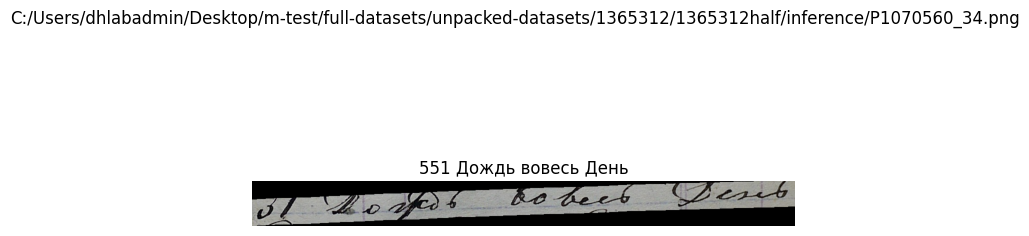

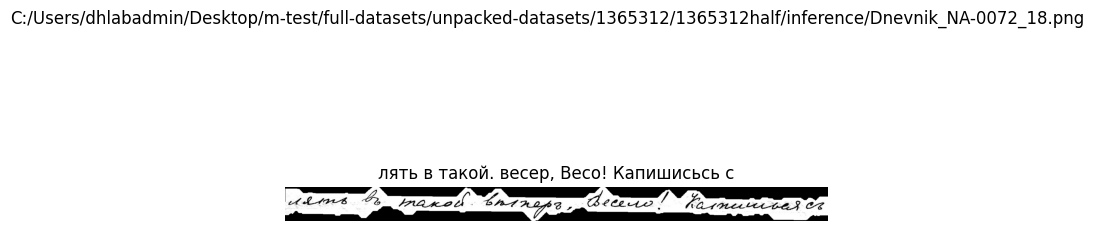

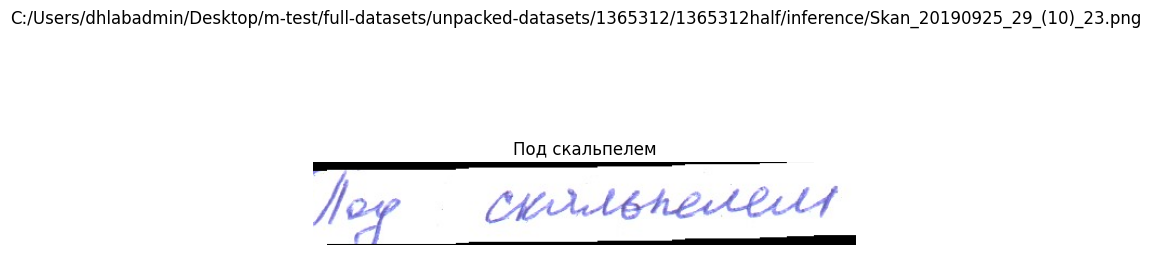

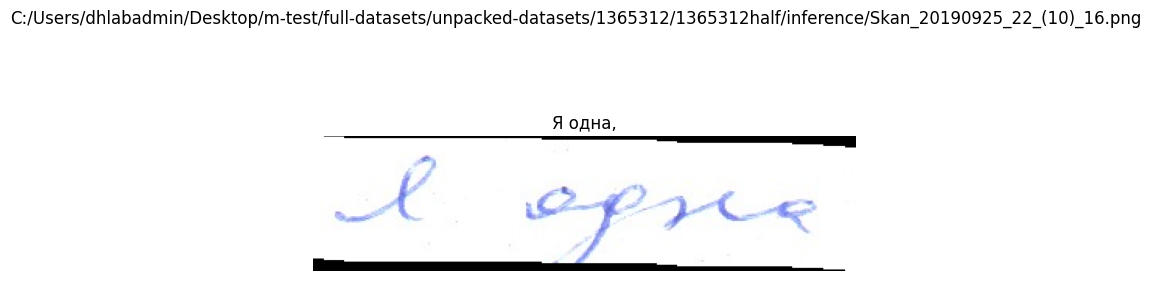

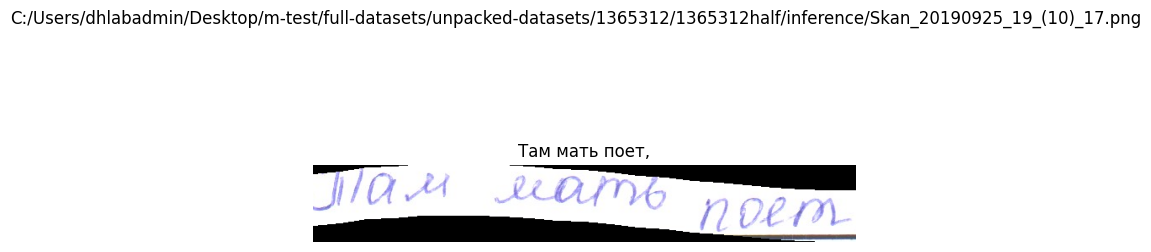

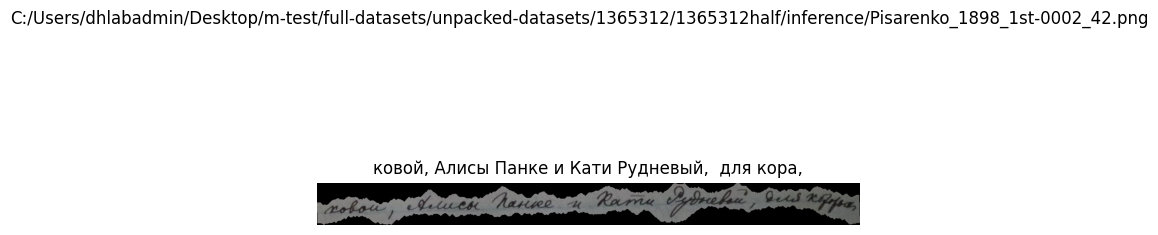

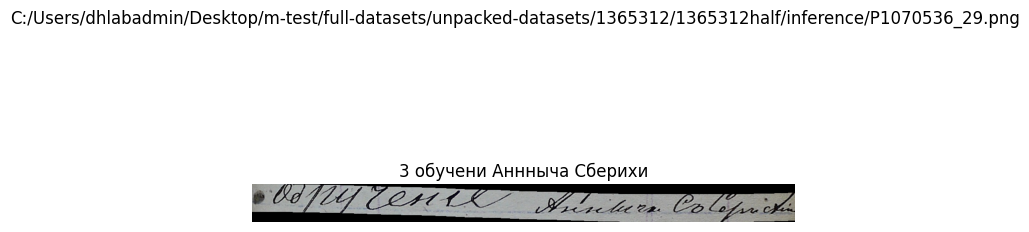

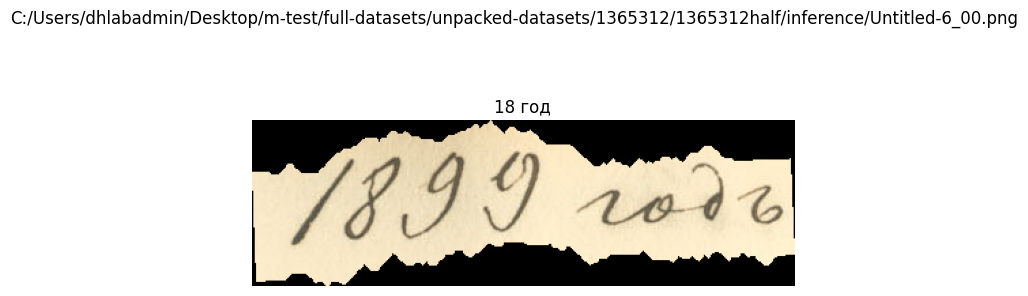

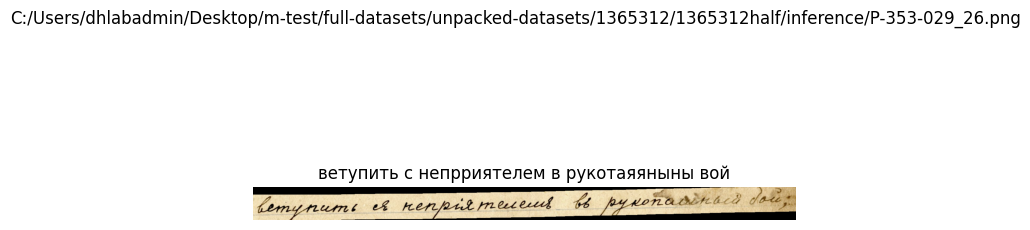

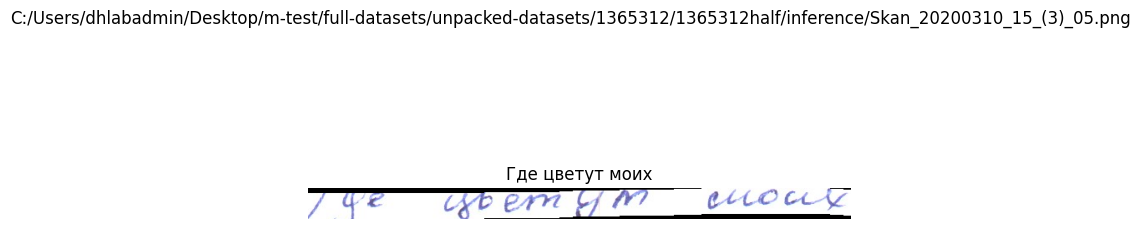

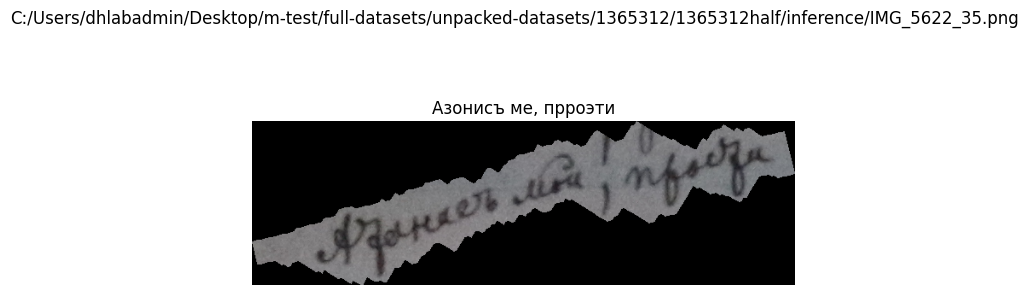

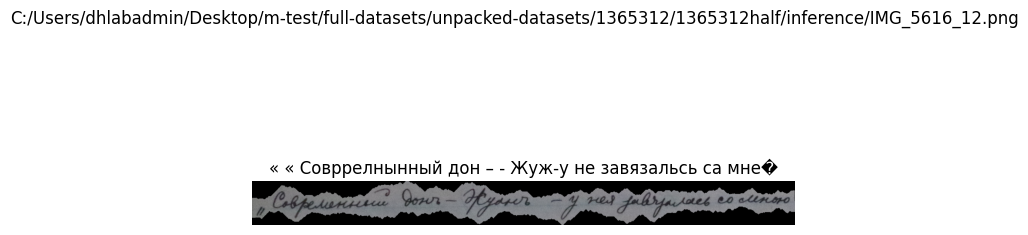

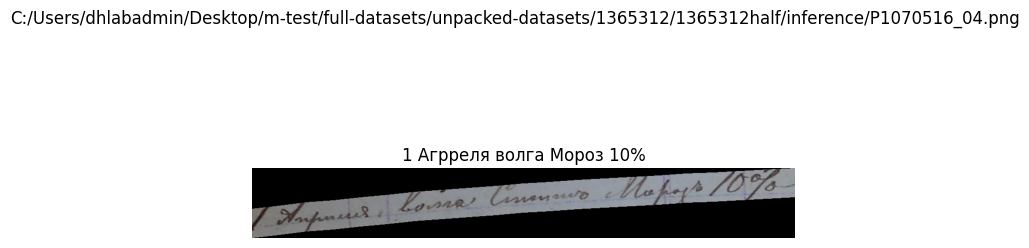

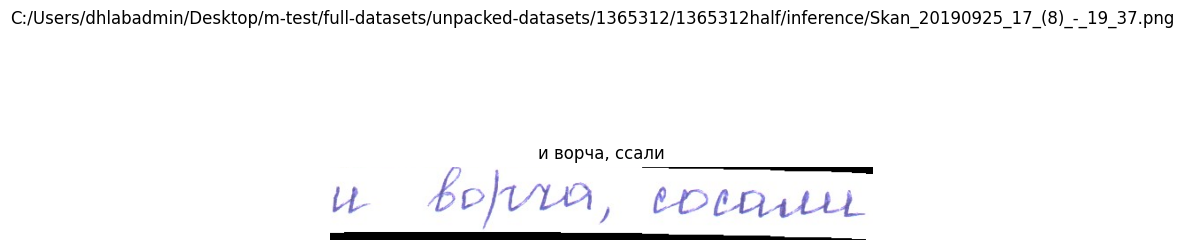

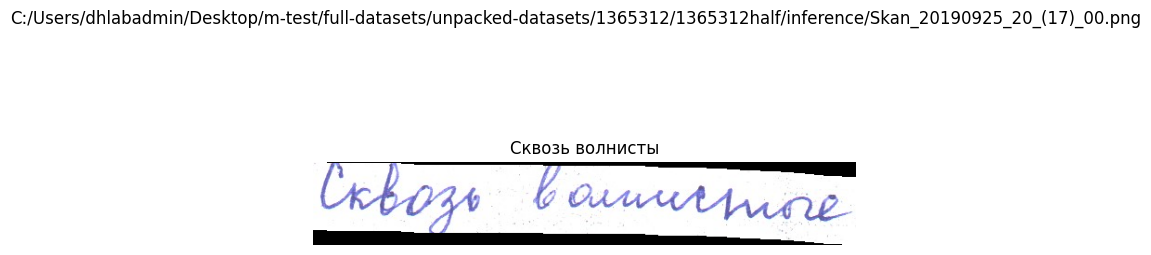

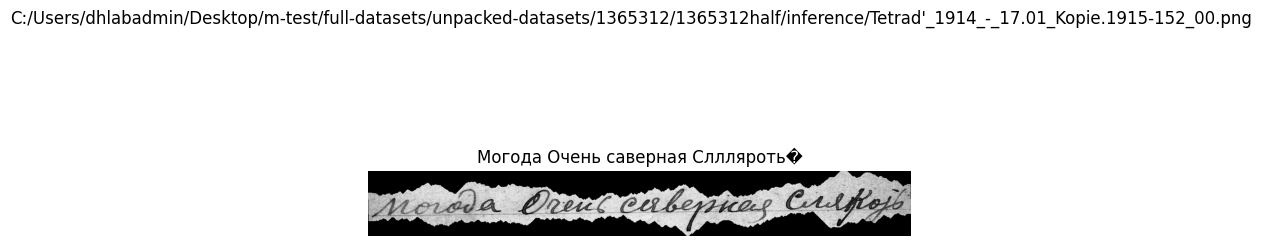

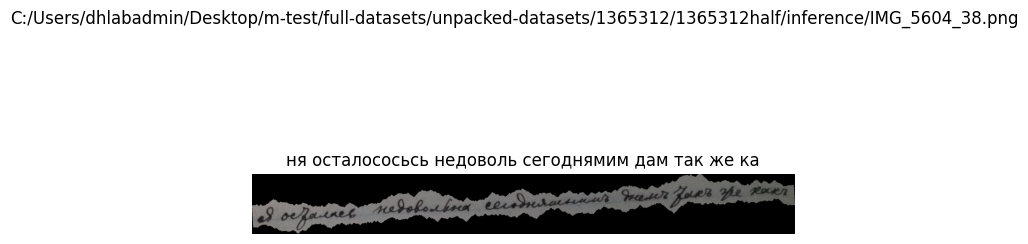

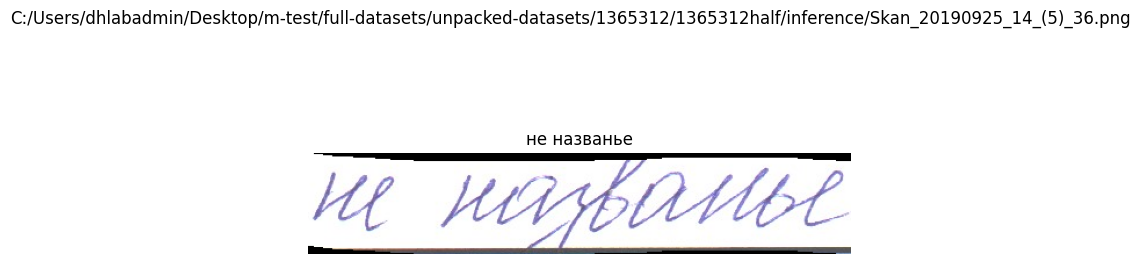

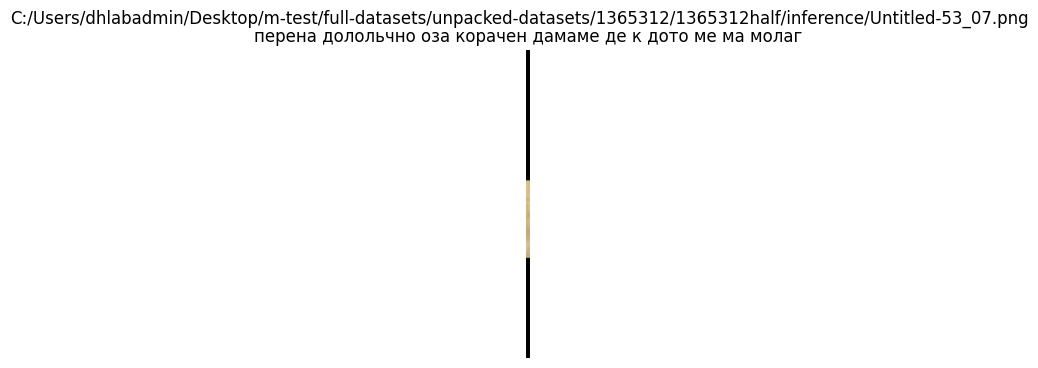

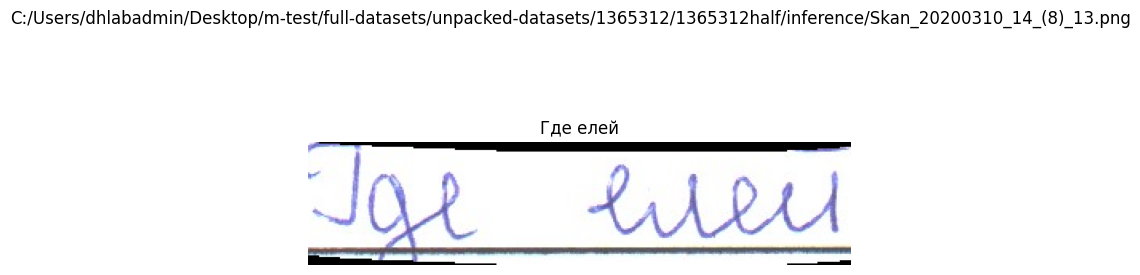

In [43]:
eval_new_data(
    data_path=os.path.join(DatasetConfig.DATA_ROOT, 'inference/'),
    num_samples=20
)